# Different way to combine the model

<img src="image/img.png">

**Heterogeneous ensembles** have two ways to combine the base model and then make prediction.

1. Using the **Combining Function** : Here the final prediction is made based on prediction made by the base learner , we combine the prediction using the Voting mechanism .
    * Hard Voting for the base learner return the class label directly.
    * Soft Voting fot the base learner return the class probability.
2. Using the **Meta Estimator** : Here second learner are used to make the prediction.Base learner are called first level learner.First level learner use the original data to train , and prediction are made by the individual first level learner.Then these prediction fed as input to the second level learner , now second level learner will be trained on the prediction made by the first level learner.Final prediction is made by the second level leaner(meta learner.)

# Base Estimator with heterogeneous ensembles

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

rnd = np.random.RandomState(45344)

X, y = make_moons(n_samples=500, noise=0.2, random_state=rnd)
X, X_val, y, y_val = train_test_split(X, y, test_size=0.25, random_state=rnd)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rnd)

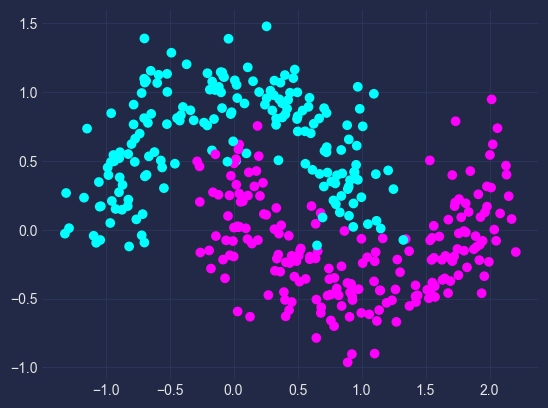

In [2]:
import matplotlib.pyplot as plt
import mplcyberpunk
import numpy as np

plt.style.use("cyberpunk")

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Fitting the base estimators

<img src="image\img_2.png">

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

estimators = [("dt", DecisionTreeClassifier(max_depth=5, random_state=rnd)),
              ("rf", RandomForestClassifier(max_depth=3, n_estimators=25, random_state=rnd)),
              ("3nn", KNeighborsClassifier(n_neighbors=3)),
              ("gn", GaussianNB()),
              ("gp", GaussianProcessClassifier(kernel=RBF(1.0), random_state=rnd)),
              ("svm", SVC(gamma=1.0, C=1.0, probability=True, random_state=rnd))]


def fit(estimators, X, y):
    for _, estimator in estimators:
        estimator.fit(X, y)
    return estimators

In [4]:
estimators = fit(estimators, X_train, y_train)

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay


def visual_decision_boundary(estimators, X_train, X_test, y_train, y_test):
    esp = 0.15
    for plt_idx, (model_name, estimator) in enumerate(estimators, start=1):
        test_error = 1 - estimator.score(X_test, y_test)
        ax = plt.subplot(2, 3, plt_idx)
        plt.setp(ax, xticks=(), yticks=(), title=f"{model_name} test error = {test_error:.2%}",
                 xlim=(X_train[:, 0].min() - esp, X_train[:, 0].max() + esp),
                 ylim=(X_train[:, 1].min() - esp, X_train[:, 1].max() + esp))
        disp = DecisionBoundaryDisplay.from_estimator(estimator=estimator,
                                                      X=X_train,
                                                      response_method="predict_proba",
                                                      ax=ax,
                                                      alpha=0.5, cmap="RdBu_r")
        plt.contour(disp.surface_, levels=[0.5], linewidths=3, colors="k")

        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")

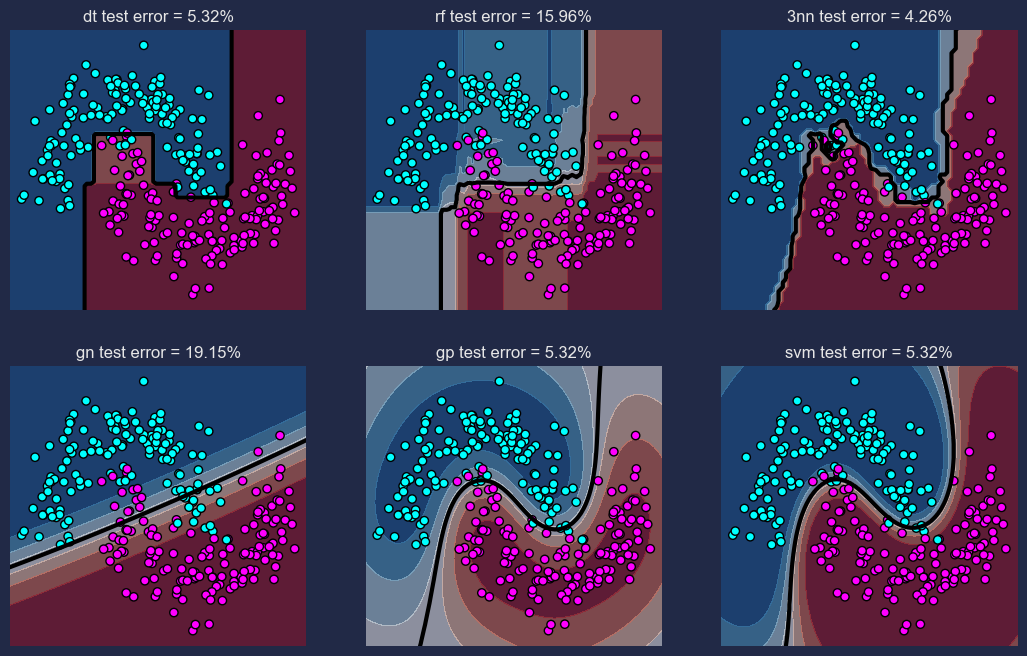

In [6]:
plt.figure(figsize=(13, 8))
visual_decision_boundary(estimators, X_train, X_test, y_train, y_test)

Aside from ensemble diversity, one other aspect that is immediately apparent from the visualization of individual base estimators is that they all don’t perform equally well on a held-out test set.SVM is best performer and decision tree is worst performer.

## Predicting the individual estimators

<img src="image\img_3.png">

In [7]:
def predict_individual(estimators, X, proba=False):
    n_samples = X.shape[0]
    n_estimators = len(estimators)
    y_pred = np.full(shape=(n_samples, n_estimators), fill_value=0.0)
    for i, (_, estimator) in enumerate(estimators):
        if proba:
            y_pred[:, i] = estimator.predict_proba(X)[:, 1]
        else:
            y_pred[:, i] = estimator.predict(X)
    return y_pred

In [8]:
y_hard = predict_individual(estimators, X_test, proba=False)

In [9]:
y_hard

array([[1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1.

In [10]:
y_soft = predict_individual(estimators, X_test, proba=True)
y_soft

array([[7.77777778e-01, 2.71901757e-01, 6.66666667e-01, 6.45814240e-02,
        4.00930495e-01, 3.57901790e-01],
       [1.00000000e+00, 9.99083969e-01, 1.00000000e+00, 9.97609744e-01,
        9.35132026e-01, 9.97135959e-01],
       [1.00000000e+00, 9.34892240e-01, 1.00000000e+00, 9.74806017e-01,
        9.18835134e-01, 9.92581277e-01],
       [0.00000000e+00, 1.77914971e-01, 0.00000000e+00, 2.68369370e-03,
        8.05863350e-02, 1.10270493e-02],
       [0.00000000e+00, 2.87056472e-01, 0.00000000e+00, 5.80796893e-01,
        1.28643796e-01, 1.82575934e-02],
       [0.00000000e+00, 1.12549020e-01, 0.00000000e+00, 2.97642865e-01,
        1.39126206e-01, 6.66511869e-03],
       [1.00000000e+00, 8.72616487e-01, 1.00000000e+00, 9.76709674e-01,
        8.92773788e-01, 9.92560665e-01],
       [0.00000000e+00, 1.14124683e-01, 0.00000000e+00, 2.09951643e-02,
        9.52218897e-02, 1.06582014e-02],
       [1.00000000e+00, 8.72616487e-01, 1.00000000e+00, 9.92474436e-01,
        9.34744185e-01, 

The prediction function above is specifically written for two-class, that is, binary classification problems. It can be extended to multi-class problems, if care is taken to store the prediction probabilities for each class. That is, for multi-class problems, you will need to store the individual prediction probabilities in an array of size `n_samples * n_estimators * n_classes`

# Combining the prediction

## Weighting the prediction

**What is aim of Weighing the classifier?**
1. Giving more importance to prediction made by classifier which have low test error.
2. So we are giving weight that is proportional to performance of the classifier, so that prediction get more importance for those classifier having low test error vice versa.

**Process of combining prediction**
1. assign the weight($w_{\text{clf}}$) to each classifier($\text{clf}$) in some way,that reflecting its performance.
2. combine the weighted prediction($w_{\text{clf}} . y_{\text{clf}} $) using a combination function($h_c$).

<img src="image\img_1.png">

### Majority Vote

1. Here the all the estimator get the equal weights.
2. Then we use `mode` to find final prediction.

In [11]:
from scipy.stats import mode


def combine_using_majority(ensemble, f_test, *args, **kwargs):
    y_hard_ = predict_individual(ensemble, f_test, proba=False)
    y_final_ = mode(y_hard_, axis=1, keepdims=False)[0]
    return y_final_

In [12]:
from sklearn.metrics import accuracy_score

y_pred = combine_using_majority(estimators, X_test)
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Majority vote strategy produces a heterogeneous ensemble with test error {test_error:.2%}")

Majority vote strategy produces a heterogeneous ensemble with test error 6.38%


### Weighted Average

Now we will give the weight to each estimator based on the performance.
$$w_t=\frac{\alpha_t}{\sum_{t=1}^m \alpha_t}$$
**Properties of weights**
1. weight always greater than equals to 0
2. sum of all weight is 1

Inorder ot get the *unbiased performance* of each estimator we will use the validation dataset.

**Why we need to use the Validation set?**
1. Using the training data to estimate the performance doesn't tell us if the estimator can generalize well.
2. it tells us how well it does on example its already seen data.
3. to get an effective and unbiased estimate we will need to evaluate performance on data has never seen before.

>This is like seeing a previously-seen homework problem on your final exam. It doesn’t really tell the professor that you’re performing well because you’ve learned the concept. It just tells the professor that you are good at that specific problem.


In [13]:
def combining_using_weighted_accuracy(ensemble, f_test, f_val, t_val, *args, **kwargs):
    # using the validation dataset to find the weights of the classifier
    y_val_individual = predict_individual(ensemble, f_val, proba=False)
    wts = [accuracy_score(t_val, y_val_individual[:, i])
           for i in range(len(ensemble))]
    wts /= np.sum(wts)

    # making the prediction of the test data, and we combine the weight with prediction to get the final prediction
    y_pred_individual = predict_individual(ensemble, f_test, proba=False)
    y_final = np.dot(y_pred_individual, wts)

    # final prediction is continues data [0,1] so we round them to get the prediction
    return np.round(y_final)

In [14]:
y_pred = combining_using_weighted_accuracy(estimators, X_test, X_val, y_val)
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Weighted average strategy produces a heterogeneous ensemble with test error {test_error:.2%}")

Weighted average strategy produces a heterogeneous ensemble with test error 5.32%


### Weighted Entropy
Entropy is a measure of uncertainty or impurity in a set; a more disorderly set will have higher entropy.

$$w_t=\frac{1 / E_t}{\sum_{t=1}^m\left(1 / E_t\right)}$$

Two key differences between entropy weighting and accuracy weighting:

1. the accuracy of a base classifier is computed using both the true labels y_true and the predicted labels y_pred. In this manner, the accuracy metric measures how well a classifier performs. A classifier with high accuracy is better.
2. the entropy of a base classifier is computed using only the predicted labels y_pred, and the entropy metric measures how uncertain a classifier is about its predictions. A classifier with low entropy (uncertainty) is better. Thus, individual base classifier weights are inversely proportional to their corresponding entropies.


In [15]:
def entropy(target_predicted):
    _, counts = np.unique(target_predicted, return_counts=True)
    p = np.array(counts.astype("float") / len(target_predicted))
    ent = np.dot(-p, np.log2(p))
    return ent

In [16]:
def combining_using_weighted_entropy(ensemble, f_test, f_val, *args, **kwargs):
    y_val_individual = predict_individual(ensemble, f_val, proba=False)
    wts = [1 / entropy(y_val_individual[:, i])
           for i in range(len(ensemble))]
    wts /= np.sum(wts)

    y_pred_individual = predict_individual(ensemble, f_test, proba=False)
    y_final = np.dot(y_pred_individual, wts)

    return np.round(y_final)

In [17]:
y_pred = combining_using_weighted_entropy(estimators, X_test, X_val)
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Weighted entropy strategy produces a heterogeneous ensemble with test error {test_error:.2%}")

Weighted entropy strategy produces a heterogeneous ensemble with test error 6.38%


### Dempster Shafer Theory:

Way to fuse the belief and evidence from the multiple resource into single belief.

1. Find the `Basic probality assignment` (BPA) and express the certainty that the test example x belong to class 1.
2. range 0 - 1.
3. BPA values closer to 1 characterize decisions made with more certainty.
4. The BPA allows us to translate an estimator’s confidence to a belief over the true label.
5. then we compute the final belief for all the class.
6. Finally, we make prediction which have more belief.

In [18]:
def combining_using_dst(ensemble, f_test, *args, **kwargs):
    esp = 0.000001
    # finding prob that observation belong to class 1
    p_individual = predict_individual(ensemble, f_test, proba=True)

    # find the Basic probability assigment for each class
    bpa_0 = 1.0 - np.prod(p_individual, axis=1)
    bpa_1 = 1.0 - np.prod(1 - p_individual, axis=1)

    belief = np.c_[bpa_0 / (1 - bpa_0 + esp), bpa_1 / (1 - bpa_1 + esp)]
    y_final = np.argmax(belief, axis=1)
    return y_final

In [19]:
y_pred = combining_using_dst(estimators, X_test)
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Dempster Shafer strategy produces a heterogeneous ensemble with test error {test_error:.2%}")

Dempster Shafer strategy produces a heterogeneous ensemble with test error 7.45%


### Visualizing the decision boundaries of all 4 weighting methods

In [20]:
def visual_decision_boundary_diff_methods(ensemble, f_train, f_val, t_train, t_val, combiners):
    esp = 0.25
    x_min, x_max = f_train[:, 0].min() - esp, f_train[:, 0].max() + esp
    y_min, y_max = f_train[:, 1].min() - esp, f_train[:, 1].max() + esp
    x_mesh, y_mesh = np.meshgrid(np.linspace(x_min, x_max, 100),
                                 np.linspace(y_min, y_max, 100))
    args = dict(ensemble=ensemble,
                f_val=f_val, t_val=t_val,
                f_test=np.c_[x_mesh.ravel(), y_mesh.ravel()])

    for plt_idx, (method, combiner) in enumerate(combiners, start=1):
        ax = plt.subplot(2, 2, plt_idx)
        plt.setp(ax, xticks=(), yticks=(), title=f"{method}")
        z_mesh = combiner(**args).reshape(x_mesh.shape)
        plt.contourf(x_mesh, y_mesh, z_mesh, cmap="RdBu_r", alpha=0.5)
        plt.contour(x_mesh, y_mesh, z_mesh, levels=[0.5], colors="k", linewidths=2)
        plt.scatter(f_train[:, 0], f_train[:, 1], edgecolors="k", c=t_train)

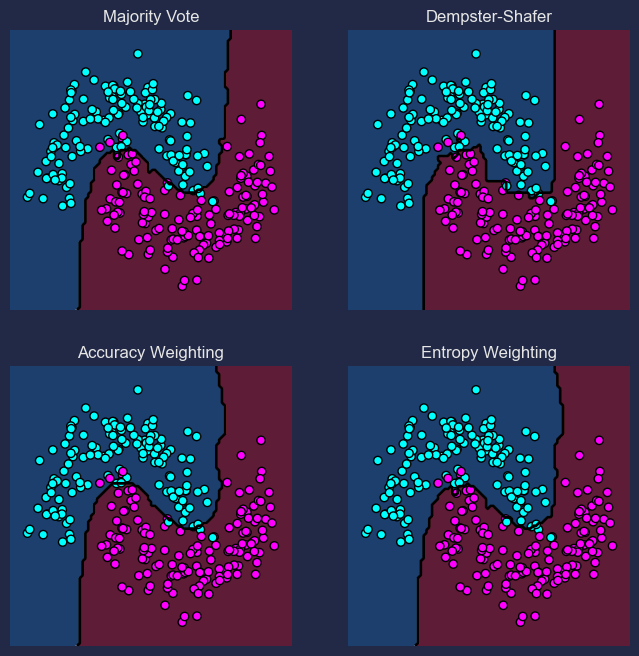

In [21]:
combination_methods = [('Majority Vote', combine_using_majority),
                       ('Dempster-Shafer', combining_using_dst),
                       ('Accuracy Weighting', combining_using_weighted_accuracy),
                       ('Entropy Weighting', combining_using_weighted_entropy)]

plt.figure(figsize=(8, 8))
visual_decision_boundary_diff_methods(estimators, X_train, X_val, y_train, y_val, combination_methods)

## Using the meta learner

Instead of carefully designing a combination function to combine predictions, we will learn a combination function over individual predictions. That is, the predictions of the base estimators are given as inputs to a second-level learning algorithm. Thus, rather than designing one ourselves, we will learn a second-level meta-classification function.

### Stacking

Stacking is the most common meta-learning method and gets its name because it stacks a second classifier on top of its base estimators. The general stacking procedure has two steps:
1. level 1: fit base estimators on the training data; this step is the same as before and aims to create a diverse, heterogeneous set of base classifiers.
2. level 2: construct a new data set from the output of the base classifiers, which become meta-features; meta-features can either be the predictions or the probability of predictions

<img src="image\img_4.png">

The level 2 estimator here can be trained using any base learning algorithm. Historically,linear models such as linear regression and logistic regression have been used. An ensemble method that use such linear models in the second level is called` linear stacking`. Linear stacking is generally popular because it is fast: learning linear models is generally computationally efficient, even for large data sets. Often, linear stacking can also be an effective exploratory step in analyzing your data set.

However, stacking can also employ powerful nonlinear classifiers in its second level, including SVMs and artificial neural networks. This allows the ensemble to combine meta-features in complex ways, though at the expense of interpretability inherent in linear models

In [22]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

rnd = np.random.RandomState(45344)

X, y = make_moons(n_samples=500, noise=0.2, random_state=rnd)
X, X_val, y, y_val = train_test_split(X, y, test_size=0.25, random_state=rnd)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rnd)

In [23]:
def visual_prediction_confidence(ensemble, features, target, n_cols):
    n_samples, n_features = features.shape
    n_estimators = len(ensemble)
    n_rows = int(np.ceil(n_estimators / n_cols))
    for plt_idx, (name, estimator) in enumerate(ensemble, start=1):
        ax = plt.subplot(n_rows, n_cols, plt_idx)
        plt.setp(ax, xticks=(), yticks=(), title=f"Meta-Feature {plt_idx} from {name}")
        estimator.fit(features, target)
        y_pred_ = estimator.predict_proba(features)[:, 1]
        for val in np.unique(target):
            plt.scatter(features[target == val, 0], features[target == val, 1], c=y_pred_[target == val], cmap="RdBu",
                        edgecolors="k")

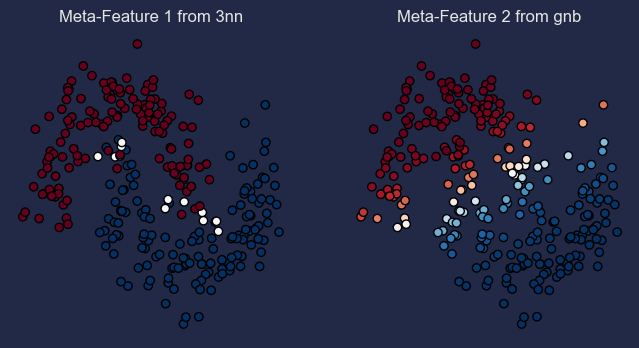

In [24]:
estimators = [("3nn", KNeighborsClassifier(n_neighbors=3)),
              ("gnb", GaussianNB())]
plt.figure(figsize=(8, 4))
visual_prediction_confidence(estimators, X_train, y_train, 2)

The darker a data point is, the more confident its prediction

In [25]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import StackingClassifier
from sklearn.base import clone


class StackingScratch(BaseEstimator):
    def __init__(self, estimators, final_estimator, *, stack_method="predict"):
        self.estimators = estimators
        self.final_estimator = final_estimator
        self.stack_method = stack_method

    def fit(self, X, y):
        # fit each of the model and store them different variable
        # because each we should not mutate the variable we initialised.
        self.estimators_ = []
        for _, estimator in self.estimators:
            self.estimators_.append(self._fit_single_estimator(clone(estimator), X, y))
        X_meta = self._predict_individual(X)
        self.final_estimator_ = self._fit_single_estimator(clone(self.final_estimator), X_meta, y)
        return self

    def _fit_single_estimator(self, estimator, X, y):
        return estimator.fit(X, y)

    def predict(self, X):
        X_meta = self._predict_individual(X)
        pred = self.final_estimator_.predict(X_meta)
        return pred

    def _predict_individual(self, X):
        n_samples = X.shape[0]
        n_estimators = len(self.estimators_)
        pred = np.full(shape=(n_samples, n_estimators), fill_value=0.0)
        for i, estimator in enumerate(self.estimators_):
            if self.stack_method == "predict":
                pred[:, i] = estimator.predict(X)
            elif self.stack_method == "predict_proba":
                pred[:, i] = estimator.predict_proba(X)[:, 1]
        return pred

In [26]:
def fit_stacking(first_level_estimators, second_level_estimator, features, target, use_prob=False):
    fit(first_level_estimators, features, target)
    X_meta = predict_individual(first_level_estimators, features, proba=use_prob)
    second_level_estimator.fit(X_meta, target)
    final_model = dict(first_level=first_level_estimators,
                       second_level=second_level_estimator,
                       use_prob=use_prob)
    return final_model

In [27]:
def predict_stacking(ensemble, f_test):
    first_level = ensemble["first_level"]
    use_prob = ensemble["use_prob"]
    second_level = ensemble["second_level"]
    X_meta = predict_individual(first_level, f_test, proba=use_prob)
    y_pred_ = second_level.predict(X_meta)
    return y_pred_

In [28]:
from sklearn.linear_model import LogisticRegression

estimators = [("dt", DecisionTreeClassifier(max_depth=5, random_state=rnd)),
              ("rf", RandomForestClassifier(max_depth=3, n_estimators=25, random_state=rnd)),
              ("3nn", KNeighborsClassifier(n_neighbors=3)),
              ("gn", GaussianNB()),
              ("gp", GaussianProcessClassifier(kernel=RBF(1.0), random_state=rnd)),
              ("svm", SVC(gamma=1.0, C=1.0, probability=True, random_state=rnd))]

meta_estimators = LogisticRegression(C=1.0)

In [29]:
stacking_model_soft = fit_stacking(first_level_estimators=estimators,
                                   second_level_estimator=meta_estimators,
                                   features=X_train,
                                   target=y_train,
                                   use_prob=True)
y_pred_soft = predict_stacking(ensemble=stacking_model_soft,
                               f_test=X_test)
test_error = 1 - accuracy_score(y_test, y_pred_soft)
test_error

0.04255319148936165

In [30]:
stacking_model_hard = fit_stacking(first_level_estimators=estimators,
                                   second_level_estimator=meta_estimators,
                                   features=X_train,
                                   target=y_train,
                                   use_prob=False)
y_pred_hard = predict_stacking(ensemble=stacking_model_hard,
                               f_test=X_test)
test_error = 1 - accuracy_score(y_test, y_pred_hard)
test_error

0.04255319148936165

In [31]:
stacking_model = StackingScratch(estimators=estimators,
                                 final_estimator=meta_estimators,
                                 stack_method="predict")
stacking_model.fit(X_train, y_train)
y_pred_hard = stacking_model.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred_hard)
test_error

0.04255319148936165

In [32]:
stacking_model = StackingScratch(estimators=estimators,
                                 final_estimator=meta_estimators,
                                 stack_method="predict_proba")
stacking_model.fit(X_train, y_train)
y_pred_soft = stacking_model.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred_soft)
test_error

0.04255319148936165

In [53]:
def visual_stacking_boundary(stack, feature, target, scenarios, n_cols=2):
    """"
    Design for the to see the decision boundary of Stacking on different stack method
    """
    n_plots = len(scenarios)
    n_rows = int(np.ceil(n_plots / n_cols))
    for plt_idx, (name, scenario) in enumerate(scenarios.items(), start=1):
        ax = plt.subplot(n_rows, n_cols, plt_idx)
        plt.setp(ax, xticks=(), yticks=(), title=f"{name} as meta features")
        # applying the different scenario and fitting
        stack.set_params(stack_method=scenario)
        stack.fit(feature, target)
        DecisionBoundaryDisplay.from_estimator(stack, feature, response_method="predict", ax=ax, cmap="RdBu", alpha=0.5)

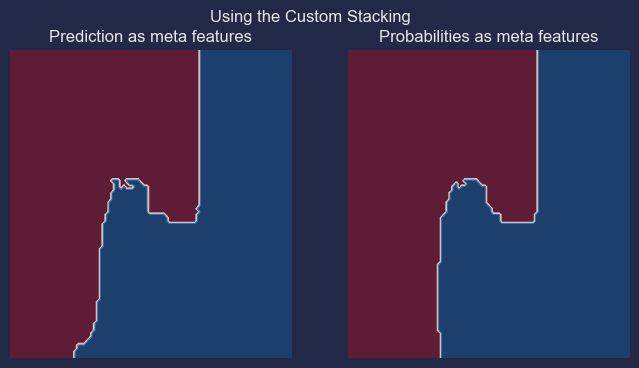

In [55]:
my_stack = StackingScratch(estimators=estimators, final_estimator=meta_estimators)
stack_method_scenario = dict(Prediction="predict",
                             Probabilities="predict_proba")
plt.figure(figsize=(6, 3))
plt.suptitle("Using the Custom Stacking")
visual_stacking_boundary(my_stack, X_train, y_train, stack_method_scenario)
plt.tight_layout()

This simple stacking procedure is often effective. However, it does suffer from one significant drawback: overfitting, especially in the presence of noisy data.

To guard against overfitting , we will use k-fold cross validation such that each base estimator is not trained on the exact same data set.

We use cross validation to partition the data set into subset so that `different base estimator are trained on different subset , this often leads to more diversity and robustness while decreasing the chances of overfitting.

### Stacking with CV

1. Randomly split the data into k equal sized  subsets.
2. Train the k models for each base estimators using the train data from the corresponding k-th fold.
3. Predict using k validation set this will the X_meta
4. **Retain each level 1 estimator on the full data set.**

In [107]:
class CustomStackingWithCV(BaseEstimator):
    def __init__(self, estimators, final_estimator=None, n_folds=5, stack_method="predict"):
        self.estimators = estimators
        self.final_estimator = final_estimator
        self.stack_method = stack_method
        self.n_folds = n_folds

    def fit(self, X, y):
        # random split on the dataset
        splitter = StratifiedKFold(n_splits=self.n_folds, shuffle=True)

        # initialise the X_meta
        n_samples = X.shape[0]
        n_estimators = len(self.estimators)
        X_meta = np.full(shape=(n_samples, n_estimators), fill_value=0.0)

        # separate the estimators
        self.estimators_ = []
        for _, estimator in self.estimators:
            self.estimators_.append(estimator)

        # train each base estimator on the n folds
        for trn, val in splitter.split(X, y):
            for est in self.estimators_:
                est.fit(X[trn, :], y[trn])
            X_meta[val, :] = self._predict_individual(X[val, :])

        # use the X_meta to fit the final estimator
        if self.final_estimator is None:
            self.final_estimator_ = LogisticRegression(C=1.0)
        else:
            self.final_estimator_ = clone(self.final_estimator)

        self.final_estimator_.fit(X_meta, y)

        # Retrain the whole base model to whole dataset
        for est in self.estimators_:
            est.fit(X, y)

        return self

    def predict(self, X):
        X_meta = self._predict_individual(X)
        pred = self.final_estimator_.predict(X_meta)
        return pred

    def _predict_individual(self, X):
        n_samples = X.shape[0]
        n_estimators = len(self.estimators_)
        pred = np.full(shape=(n_samples, n_estimators), fill_value=0.0)
        for i, est in enumerate(self.estimators_):
            if self.stack_method == "predict":
                pred[:, i] = est.predict(X)
            elif self.stack_method == "predict_proba":
                pred[:, i] = est.predict_proba(X)[:, 1]
        return pred


    def _fit_single_estimator(estimator, X, y):
        return estimator.fit(X, y)

In [108]:
custom_stack_with_cv = CustomStackingWithCV(estimators,meta_estimators,stack_method="predict_proba")
custom_stack_with_cv.fit(X_train,y_train)
y_pred_soft = custom_stack_with_cv.predict(X_test)
test_error = 1 - accuracy_score(y_test,y_pred_soft)
test_error

0.05319148936170215

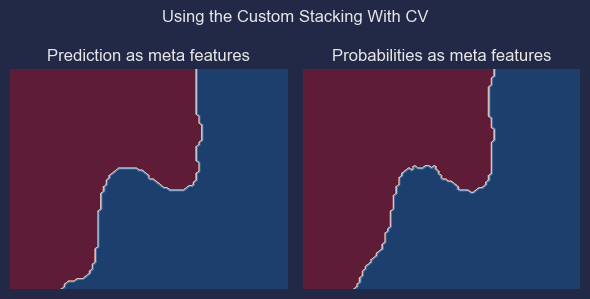

In [109]:
stack_method_scenario = dict(Prediction="predict",
                             Probabilities="predict_proba")
plt.figure(figsize=(6, 3))
plt.suptitle("Using the Custom Stacking With CV")
visual_stacking_boundary(custom_stack_with_cv, X_train, y_train, stack_method_scenario)
plt.tight_layout()

we can visualize our stacked model. We see that the decision boundary is smoother, less jagged and less prone to overfitting overall.

**But increase the training time.**

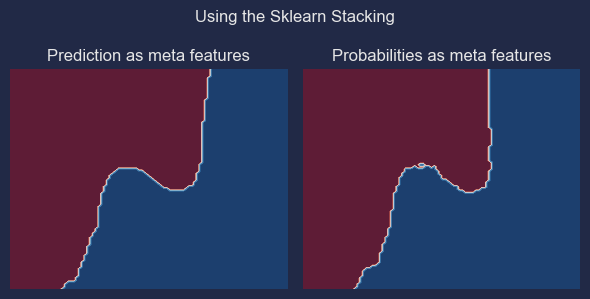

In [96]:
from sklearn.ensemble import  StackingClassifier
sk_stack = StackingClassifier(estimators,meta_estimators)

plt.figure(figsize=(6, 3))
plt.suptitle("Using the Sklearn Stacking")
visual_stacking_boundary(sk_stack,X_train,y_train,stack_method_scenario)
plt.tight_layout()